# Global Terrorism Attack

# Description
The Global Terrorism Database (GTD) includes information on terrorist events around the World (205 countries, more than 33000 cities, from 1970 through 2016 on at least 45 variables for each case, with more recent incidents including information on more than 120 variables

In [1]:
library(tidyverse)
library(ggplot2) # Data visualization
library(readr) # Read_csv function
library(dplyr)
options(dplyr.width=Inf)

Warning message:
"package 'tidyverse' was built under R version 3.6.3"-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.0 --
v ggplot2 3.3.2     v purrr   0.3.4
v tibble  3.0.4     v dplyr   1.0.2
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'purrr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


In [2]:
gtd = read.csv(file="https://bitbucket.org/sevgilit/bda503/raw/8ef59a06fd743de89955610b2af9ca4e288bc1c1/globalterrorismdb_0617dist.csv", header=TRUE, sep=",") 

In [3]:
turkey.gtd <- gtd%>%
filter(country_txt == "Turkey")

In [4]:
problems(turkey.gtd)

row,col,expected,actual


In [5]:
glimpse(turkey.gtd)

Rows: 4,106
Columns: 135
$ eventid            <dbl> 197004250001, 197008310001, 197010020002, 197010...
$ iyear              <int> 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, ...
$ imonth             <int> 4, 8, 10, 10, 10, 10, 10, 11, 11, 11, 12, 12, 1,...
$ iday               <int> 25, 31, 2, 3, 3, 6, 27, 10, 21, 23, 24, 29, 7, 1...
$ approxdate         <fct> , , , , , , , , , , , , , , , , , , , , , , , , , 
$ extended           <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
$ resolution         <fct> , , , , , , , , , , , , , , , , , , , , , , , , ...
$ country            <int> 209, 209, 209, 209, 209, 209, 209, 209, 209, 209...
$ country_txt        <fct> Turkey, Turkey, Turkey, Turkey, Turkey, Turkey, ...
$ region             <int> 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, ...
$ region_txt         <fct> Middle East & North Africa, Middle East & North ...
$ provstate          <fct> Istanbul, Ankara, Izmir, Ankara, Ankara, Ankara,...
$ city               <fct> I

In [9]:
head(gtd)

eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
1.97000e+11,1970,7,2,,0,,58,Dominican Republic,2,...,,,,,PGIS,0,0,0,0,
1.97000e+11,1970,0,0,,0,,130,Mexico,1,...,,,,,PGIS,0,1,1,1,
1.97001e+11,1970,1,0,,0,,160,Philippines,5,...,,,,,PGIS,-9,-9,1,1,
1.97001e+11,1970,1,0,,0,,78,Greece,8,...,,,,,PGIS,-9,-9,1,1,
1.97001e+11,1970,1,0,,0,,101,Japan,4,...,,,,,PGIS,-9,-9,1,1,
1.97001e+11,1970,1,1,,0,,217,United States,1,...,"The Cairo Chief of Police, William Petersen, resigned as a result of the attack.","""Police Chief Quits,"" Washington Post, January 2, 1970.","""Cairo Police Chief Quits; Decries Local 'Militants',"" Afro-American, January 10, 1970.","Christopher Hewitt, ""Political Violence and Terrorism in Modern America: A Chronology,"" Praeger Security International, 2005.",Hewitt Project,-9,-9,0,-9,


## Data Cleaning
Since there are more than 100 variables, first we selected which variables are meaningful for the analysis for Turkey. Other columns are the sub categories of these informations and not available for all events.

In [6]:
gtd.turkey = select(turkey.gtd,eventid,year = iyear, month = imonth,
                   day = iday, country_code = country, country_name = country_txt,
                   region_code = region, region_name =region_txt, provstate,city,
                   latitude,longitude,location, success,attacktype1 = attacktype1_txt,
                   attacktype2 = attacktype2_txt,attacktype3 = attacktype3_txt,
                   targtype1=targtype1_txt,targsubtype1=targsubtype1_txt
                   ,weaptype1=weaptype1_txt, weapsubtype1=weapsubtype1_txt,
                   property,propextent_txt,propvalue,gname,nkill,nwound)

In [7]:
glimpse(gtd.turkey)

Rows: 4,106
Columns: 27
$ eventid        <dbl> 197004250001, 197008310001, 197010020002, 1970100300...
$ year           <int> 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970...
$ month          <int> 4, 8, 10, 10, 10, 10, 10, 11, 11, 11, 12, 12, 1, 1, ...
$ day            <int> 25, 31, 2, 3, 3, 6, 27, 10, 21, 23, 24, 29, 7, 11, 2...
$ country_code   <int> 209, 209, 209, 209, 209, 209, 209, 209, 209, 209, 20...
$ country_name   <fct> Turkey, Turkey, Turkey, Turkey, Turkey, Turkey, Turk...
$ region_code    <int> 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, ...
$ region_name    <fct> Middle East & North Africa, Middle East & North Afri...
$ provstate      <fct> Istanbul, Ankara, Izmir, Ankara, Ankara, Ankara, Ank...
$ city           <fct> Istanbul, Ankara, Izmir, Ankara, Ankara, Ankara, Ank...
$ latitude       <dbl> 41.01484, 39.91839, 38.42371, 39.91839, 39.91839, 39...
$ longitude      <dbl> 28.96141, 32.86560, 27.13421, 32.86560, 32.86560, 32...
$ location       <fct> , , ,

In [8]:
head(gtd.turkey)

eventid,year,month,day,country_code,country_name,region_code,region_name,provstate,city,...,targtype1,targsubtype1,weaptype1,weapsubtype1,property,propextent_txt,propvalue,gname,nkill,nwound
197004250001,1970,4,25,209,Turkey,10,Middle East & North Africa,Istanbul,Istanbul,...,Airports & Aircraft,Airline Officer/Personnel,Explosives/Bombs/Dynamite,Unknown Explosive Type,1,,NA,Palestinians,0,0
197008310001,1970,8,31,209,Turkey,10,Middle East & North Africa,Ankara,Ankara,...,Military,Military Unit/Patrol/Convoy,Explosives/Bombs/Dynamite,Unknown Explosive Type,1,,NA,Turkish People's Liberation Army,0,0
197010020002,1970,10,2,209,Turkey,10,Middle East & North Africa,Izmir,Izmir,...,Military,Military Barracks/Base/Headquarters/Checkpost,Explosives/Bombs/Dynamite,Dynamite/TNT,1,,NA,Turkish People's Liberation Front (TPLF)(THKP-C),0,0
197010030001,1970,10,3,209,Turkey,10,Middle East & North Africa,Ankara,Ankara,...,Government (Diplomatic),Embassy/Consulate,Explosives/Bombs/Dynamite,Unknown Explosive Type,1,,NA,Unknown,NA,NA
197010030002,1970,10,3,209,Turkey,10,Middle East & North Africa,Ankara,Ankara,...,Business,,Explosives/Bombs/Dynamite,Unknown Explosive Type,1,,NA,Turkish People's Liberation Army,0,0
197010060001,1970,10,6,209,Turkey,10,Middle East & North Africa,Ankara,Ankara,...,Military,Military Transportation/Vehicle (excluding convoys),Incendiary,,1,,NA,Turkish People's Liberation Army,0,0


## Terrorist Attacks, 1970-2016 (Global vs Turkey)

In [10]:
library(gridExtra)

Warning message:
"package 'gridExtra' was built under R version 3.6.3"
Attaching package: 'gridExtra'

The following object is masked from 'package:dplyr':

    combine



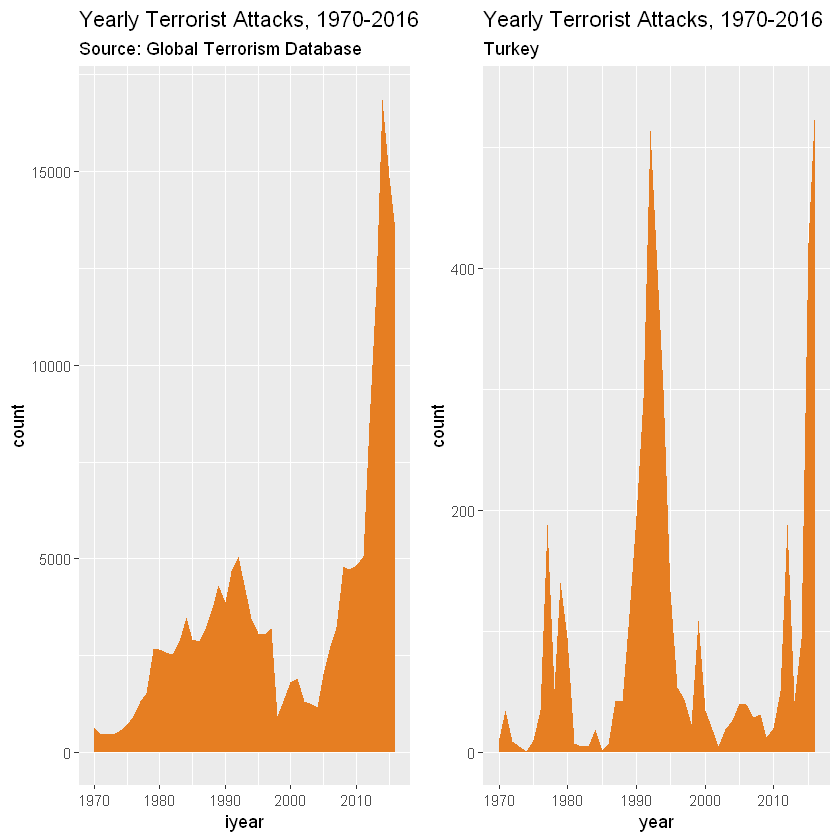

In [12]:
library(ggplot2)
library(gridExtra)
plot1<-ggplot(data=gtd) +
  geom_area(mapping=aes(x=iyear), stat="count", fill= ('#e67e22')) +
  ggtitle("Yearly Terrorist Attacks, 1970-2016", subtitle = "Source: Global Terrorism Database")

plot2<-ggplot(data=gtd.turkey) +
  geom_area(mapping=aes(x=year), stat="count", fill= ('#e67e22')) +
  ggtitle("Yearly Terrorist Attacks, 1970-2016", subtitle = "Turkey")

grid.arrange(plot1, 
             plot2, 
             ncol=2)

## Histogram of Attacks by Year

Warning message:
"Use of `gtd.turkey$year` is discouraged. Use `year` instead."Warning message:
"Removed 2 rows containing missing values (geom_bar)."

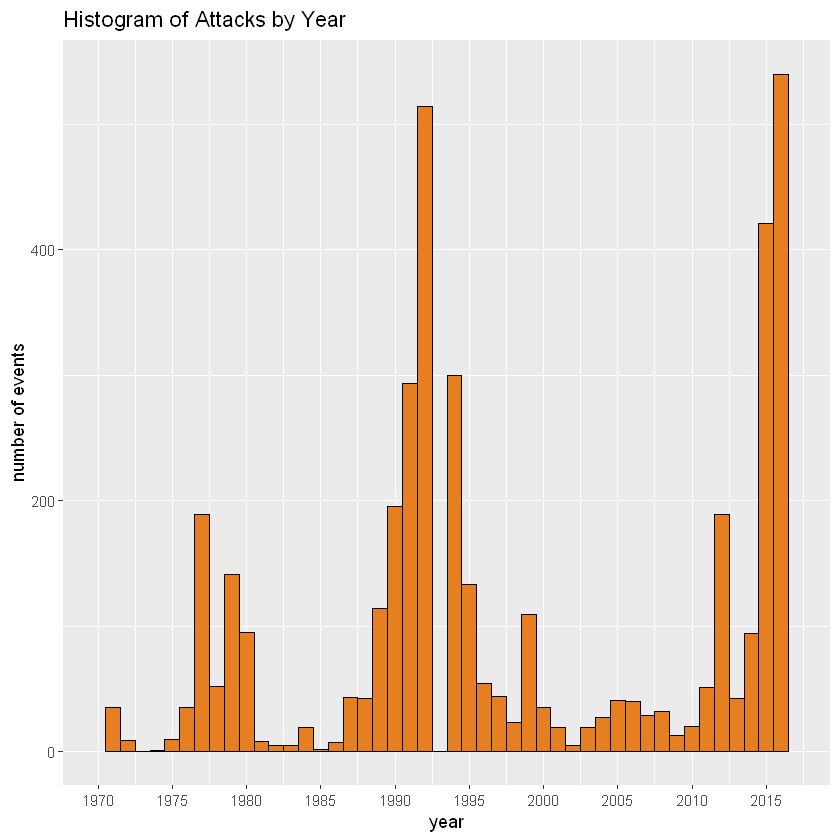

In [13]:
library(ggplot2)
ggplot(gtd.turkey, aes(gtd.turkey$year)) +
  geom_histogram(fill= ('#e67e22'), color='black', binwidth=1) +
  scale_x_continuous(limit=c(1970, 2017), breaks=seq(1970, 2017, by = 5)) +
  labs(x= 'year', y= 'number of events') +
  ggtitle('Histogram of Attacks by Year')

# Histogram of Attacks by Month

`summarise()` ungrouping output (override with `.groups` argument)


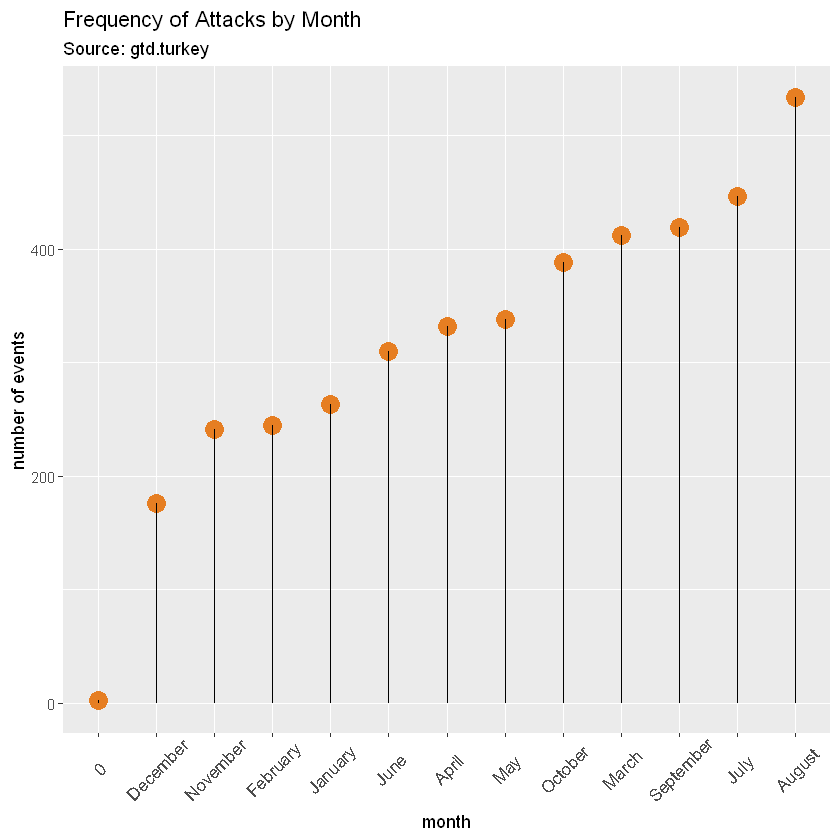

In [15]:
gtd.turkey.month<-gtd.turkey%>%
  group_by(month)%>%
  summarise(numberOfEvents=n())

gtd.turkey.month$month[gtd.turkey.month$month == 0] <- 0
gtd.turkey.month$month[gtd.turkey.month$month == 1] <- "January"
gtd.turkey.month$month[gtd.turkey.month$month == 2] <- "February"
gtd.turkey.month$month[gtd.turkey.month$month == 3] <- "March"
gtd.turkey.month$month[gtd.turkey.month$month == 4] <- "April"
gtd.turkey.month$month[gtd.turkey.month$month == 5] <- "May"
gtd.turkey.month$month[gtd.turkey.month$month == 6] <- "June"
gtd.turkey.month$month[gtd.turkey.month$month == 7] <- "July"
gtd.turkey.month$month[gtd.turkey.month$month == 8] <- "August"
gtd.turkey.month$month[gtd.turkey.month$month == 9] <- "September"
gtd.turkey.month$month[gtd.turkey.month$month == 10] <- "October"
gtd.turkey.month$month[gtd.turkey.month$month == 11] <- "November"
gtd.turkey.month$month[gtd.turkey.month$month == 12] <- "December"

gtd.turkey.month <- gtd.turkey.month[order(gtd.turkey.month$numberOfEvents), ]
gtd.turkey.month$month <- factor(gtd.turkey.month$month, levels = gtd.turkey.month$month)

# Plot
ggplot(gtd.turkey.month, aes(x=month, y=numberOfEvents)) + 
  geom_point(size=5,color='#e67e22') + 
  geom_segment(aes(x=month, 
                   xend=month, 
                   y=0, 
                   yend=numberOfEvents)) + 
  labs(x= 'month', y= 'number of events') +
  labs(title="Frequency of Attacks by Month", 
       subtitle="Source: gtd.turkey") + 
  theme(axis.text.x = element_text(angle=45, vjust=0.6, size=10))

### Frequency of Attacks by City

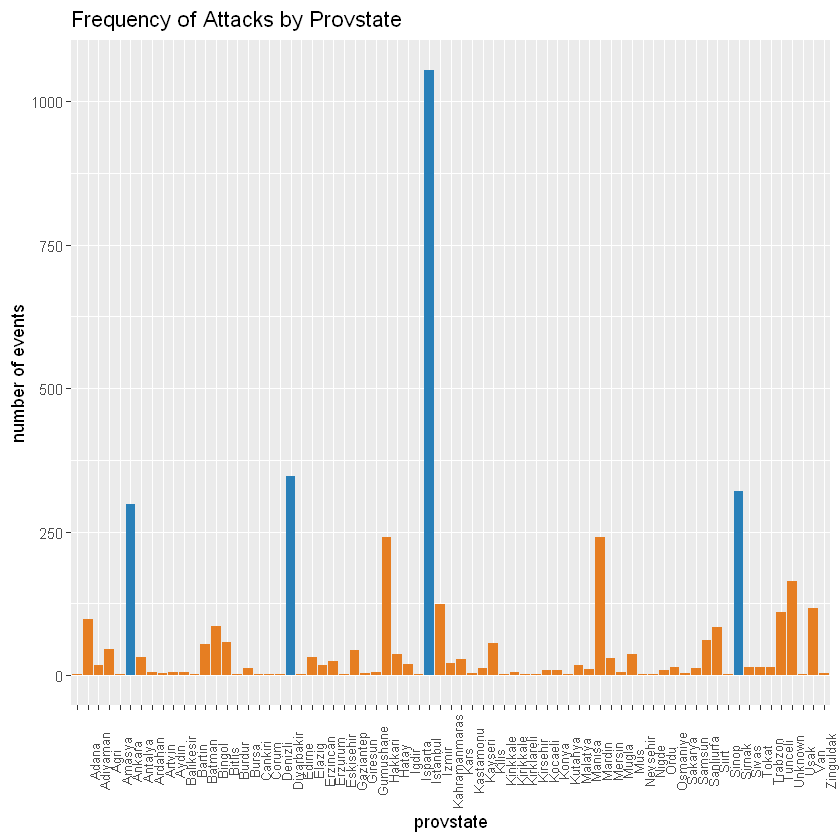

In [16]:
gtd.turkey %>%
    group_by(provstate)%>% 
    count() %>% # count the number of times a provstate appear
      ggplot(aes(x=provstate,y=n))+
      geom_bar(stat = "identity",aes(fill=n>250)) +
      theme(axis.text.x = element_text(angle=90,size=8,vjust=1, hjust=0.5)) +
      labs(x= 'provstate', y= 'number of events') +
      ggtitle('Frequency of Attacks by Provstate')+
      scale_fill_manual(values = c('#e67e22', '#2980b9'),guide=FALSE)

### Frequency of Attacks by Attacktype

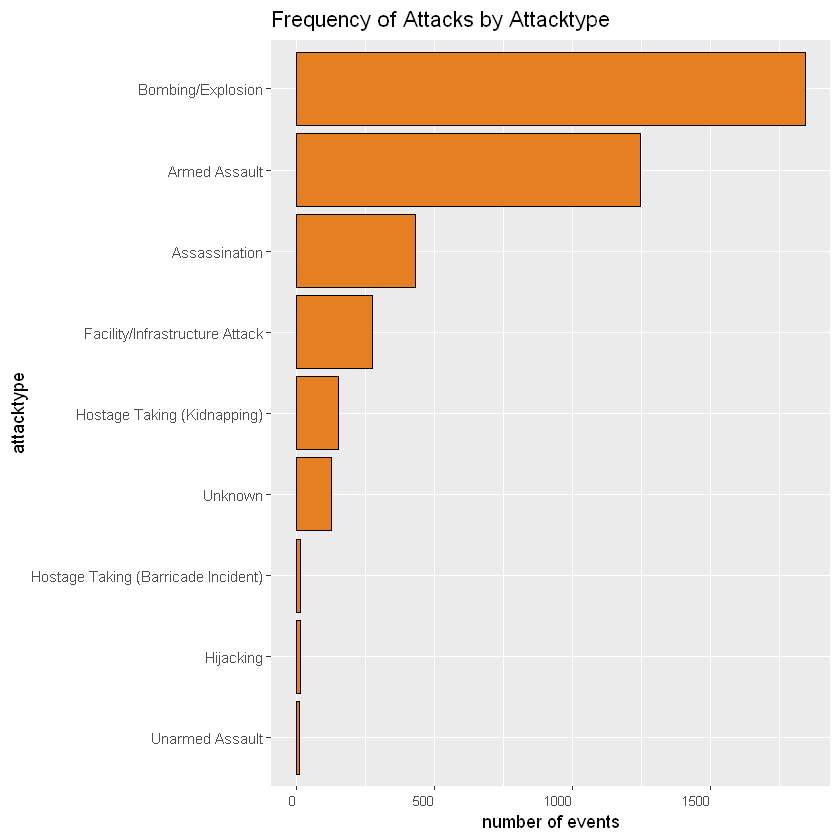

In [17]:
gtd.turkey %>%
    group_by(attacktype1)%>% 
    count() %>%
    arrange(desc(n)) %>%
      ggplot(aes(x=reorder(attacktype1,n),y=n)) +
      geom_bar(stat = "identity",fill= ('#e67e22'), color='black') +
      theme(axis.text.x = element_text(size=8,vjust=1, hjust=1)) +
      labs(x= 'attacktype', y= 'number of events') +
      ggtitle('Frequency of Attacks by Attacktype') +
      coord_flip()

### Frequency of Attacks by Target type

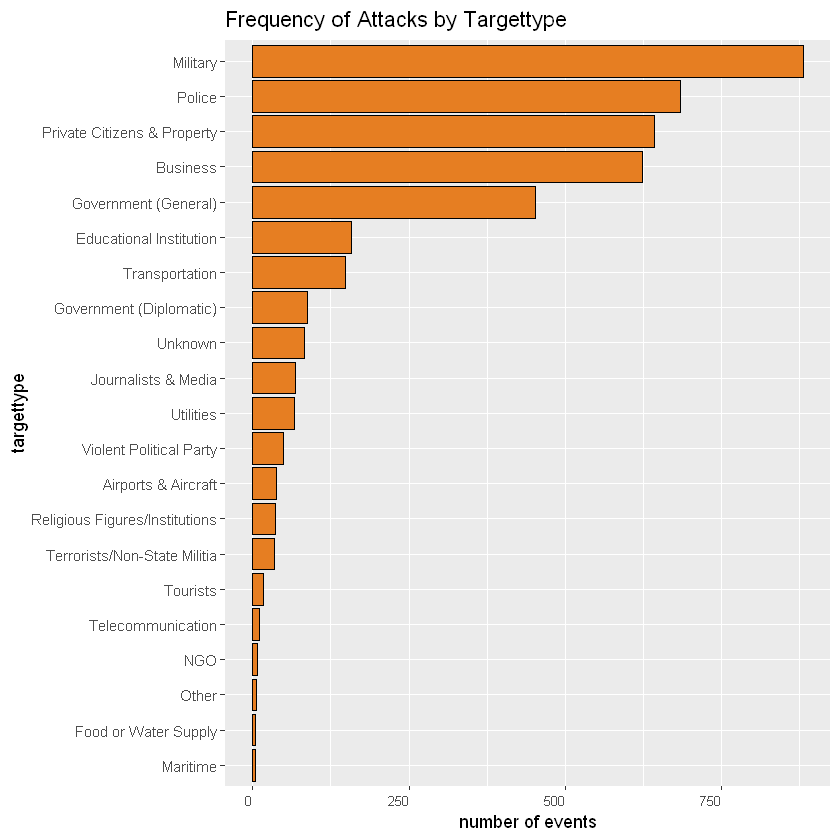

In [18]:
gtd.turkey %>%
    group_by(targtype1)%>% 
    count() %>%
    arrange(desc(n)) %>%
      ggplot(aes(x=reorder(targtype1,n),y=n)) +
      geom_bar(stat = "identity",fill= ('#e67e22'), color='black') +
      theme(axis.text.x = element_text(size=8,vjust=1, hjust=1)) +
      labs(x= 'targettype', y= 'number of events') +
      ggtitle('Frequency of Attacks by Targettype') +
      coord_flip()

### Frequency of Attacks by Weapon type

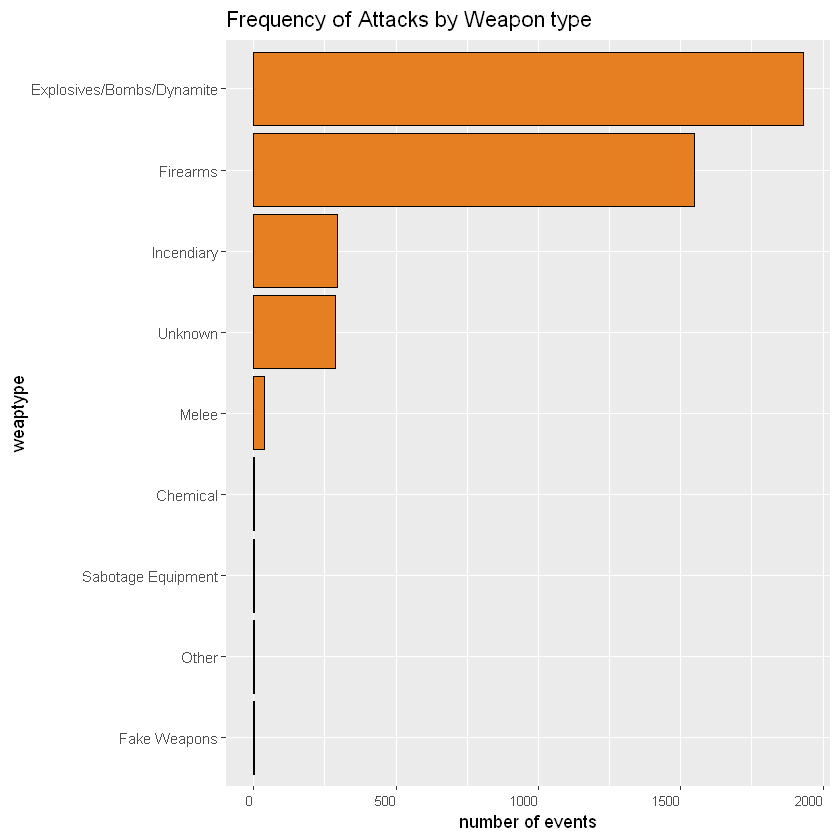

In [19]:
gtd.turkey %>%
    group_by(weaptype1)%>% 
    count() %>%
    arrange(desc(n)) %>%
      ggplot(aes(x=reorder(weaptype1,n),y=n)) +
      geom_bar(stat = "identity",fill= ('#e67e22'), color='black') +
      theme(axis.text.x = element_text(size=8,vjust=1, hjust=1)) +
      labs(x= 'weaptype', y= 'number of events') +
      ggtitle('Frequency of Attacks by Weapon type') +
      coord_flip()

### Frequency of Group Name

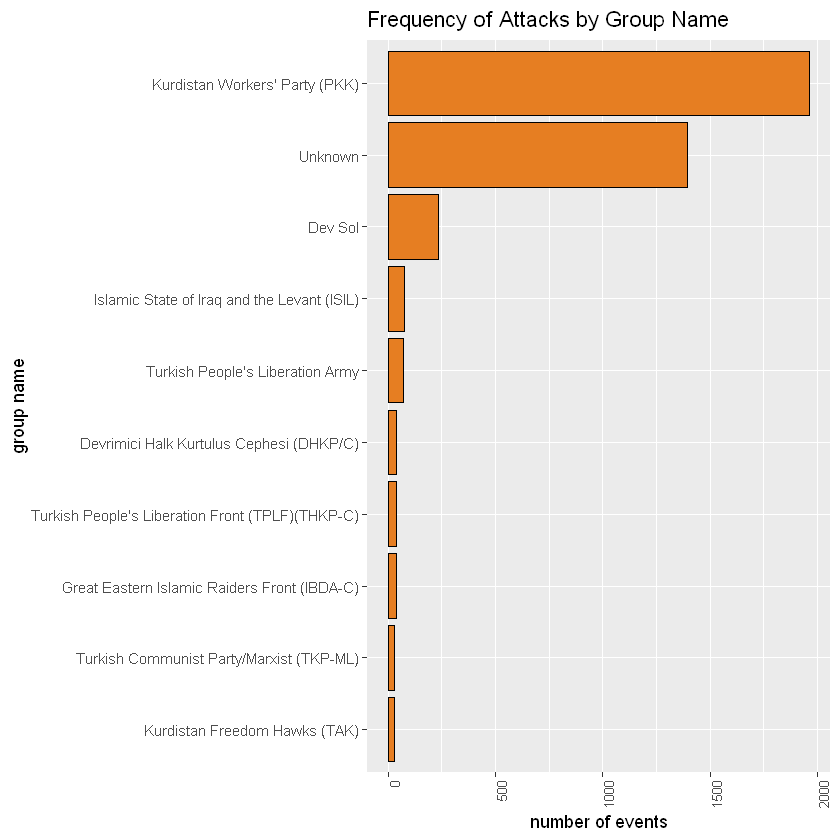

In [20]:
gtd.turkey %>%
    group_by(gname)%>% # group by gname
    count() %>% # count the number of times a gname appear
    arrange(desc(n)) %>% # subset by rows based on condition
    head(n=10) %>%
      ggplot(aes(x=reorder(gname,n),y=n))+
      geom_bar(stat = "identity",fill= ('#e67e22'), color='black') +
      theme(axis.text.x = element_text(angle=90,size=8,vjust=1, hjust=1)) +
      labs(x= 'group name', y= 'number of events') +
      ggtitle('Frequency of Attacks by Group Name') +
      coord_flip()

## Attacks vs Casualities

In [21]:
gtd.turkey.year= group_by(gtd.turkey, year) %>%
  summarise(numberOfEvents = length(eventid), numberOfCasualties = sum(nkill, na.rm = TRUE))

`summarise()` ungrouping output (override with `.groups` argument)


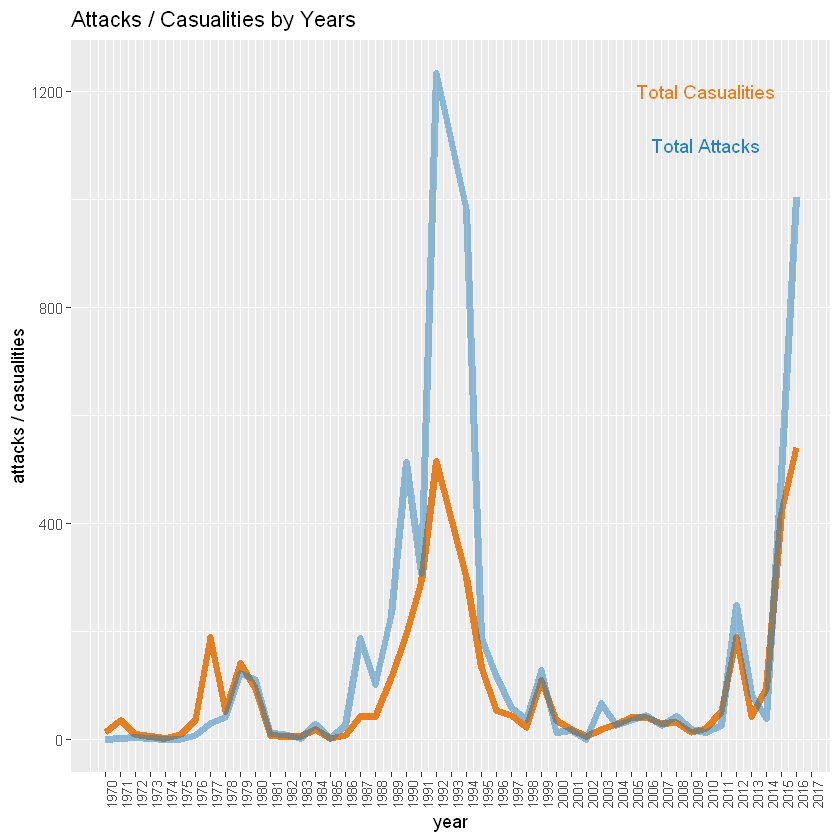

In [22]:
ggplot(gtd.turkey.year, aes(x = year)) +
  geom_line(aes(y = numberOfEvents), size = 2,colour = '#e67e22') +
  geom_line(aes(y = numberOfCasualties), size = 2, ,colour = ('#2980b9'), alpha=0.5) +
  scale_x_continuous(breaks=seq(1970,2017,1)) +
  annotate("text", x = c(2010,2010), y = c(1200,1100),
           label = c("Total Casualities", "Total Attacks"), colour = c(('#e67e22'), ('#2980b9')), size = 4)  +
  ggtitle("Attacks / Casualities by Years") +
  theme(axis.text.x = element_text(angle=90, size=8)) +
  labs(x = "year", y = "attacks / casualities")

### Killed vs Wounded Rate

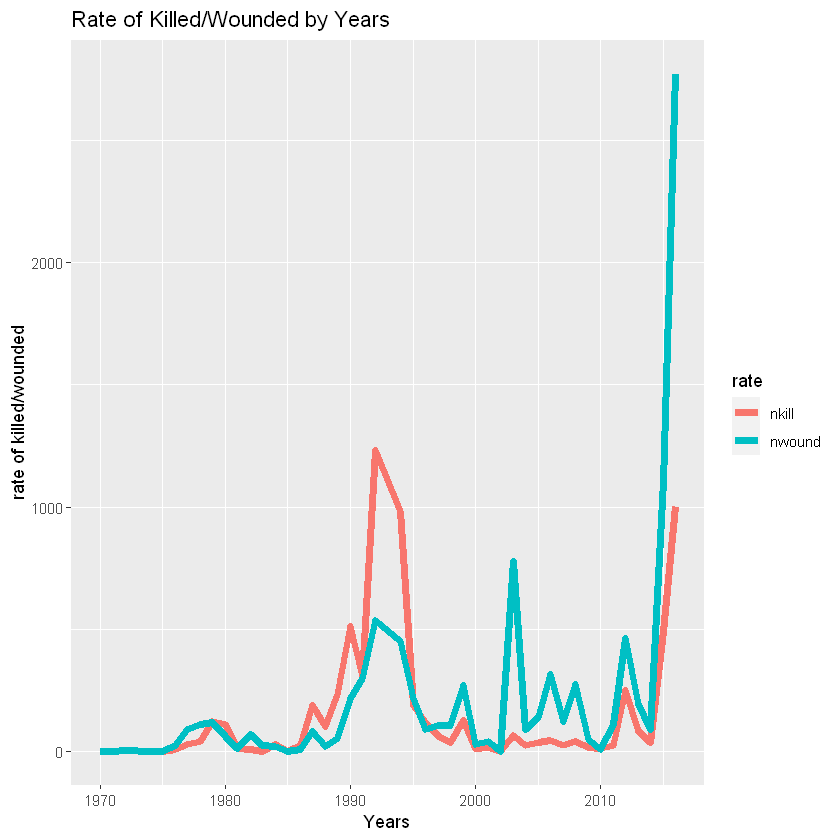

In [23]:
gtd.turkey %>%
  mutate(total = 1) %>% # total attacks that year (creates a new variable)
  count(year, wt=nkill) %>% # failed attempt
  cbind("nkill") ->killed
  colnames(killed)[3] <- "rate"

gtd.turkey %>%
  count(year, wt = nwound) %>% 
  cbind("nwound")-> wounded
colnames(wounded)[3] <- "rate"

rbind(killed,wounded) %>%
  ggplot(aes(year,n)) +  
  geom_line(aes(group=rate, colour=rate),size = 2)+
  ggtitle("Rate of Killed/Wounded by Years") +
  labs(x = "Years", y = "rate of killed/wounded")

### gname vs nkill

`summarise()` ungrouping output (override with `.groups` argument)


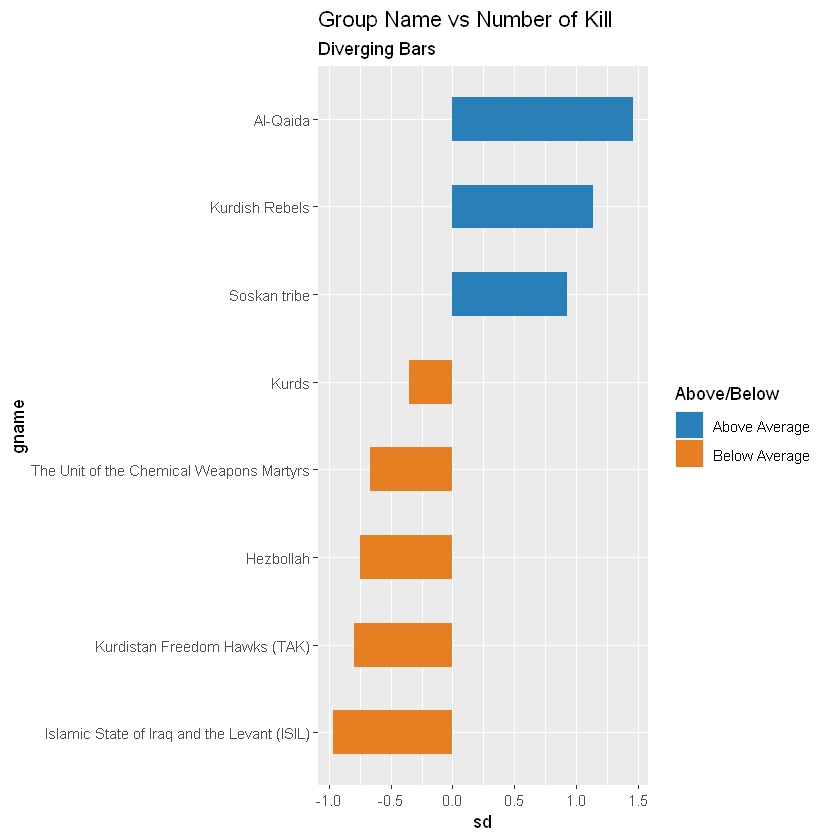

In [24]:
gtd.turkey$nkill[is.na(gtd.turkey$nkill)] <- 0
gnamevnkill<-gtd.turkey%>%
  group_by(gname)%>%   
  summarise(avgkillperattack= mean(nkill)) %>%
  filter(avgkillperattack > 5)

# Data Prep
gnamevnkill$sd <- round((gnamevnkill$avgkillperattack - mean(gnamevnkill$avgkillperattack))/sd(gnamevnkill$avgkillperattack), 2)  # compute normalized mpg
gnamevnkill$mpg_type <- ifelse(gnamevnkill$sd < 0, "below", "above")  # above / below avg flag
gnamevnkill <- gnamevnkill[order(gnamevnkill$sd), ]  # sort
gnamevnkill$gname <- factor(gnamevnkill$gname, levels = gnamevnkill$gname)  # convert to factor to retain sorted order in plot.

# Diverging Barcharts
ggplot(gnamevnkill, aes(x=gname, y=sd, label=sd)) + 
  geom_bar(stat='identity', aes(fill=mpg_type), width=.5)  +
  scale_fill_manual(name="Above/Below",labels = c("Above Average", "Below Average"), 
                    values = c("above"="#2980b9", "below"="#e67e22")) + 
  labs(subtitle="Diverging Bars", 
       title= "Group Name vs Number of Kill") + 
  coord_flip()

## Yearly terrorist attacks by Attack type

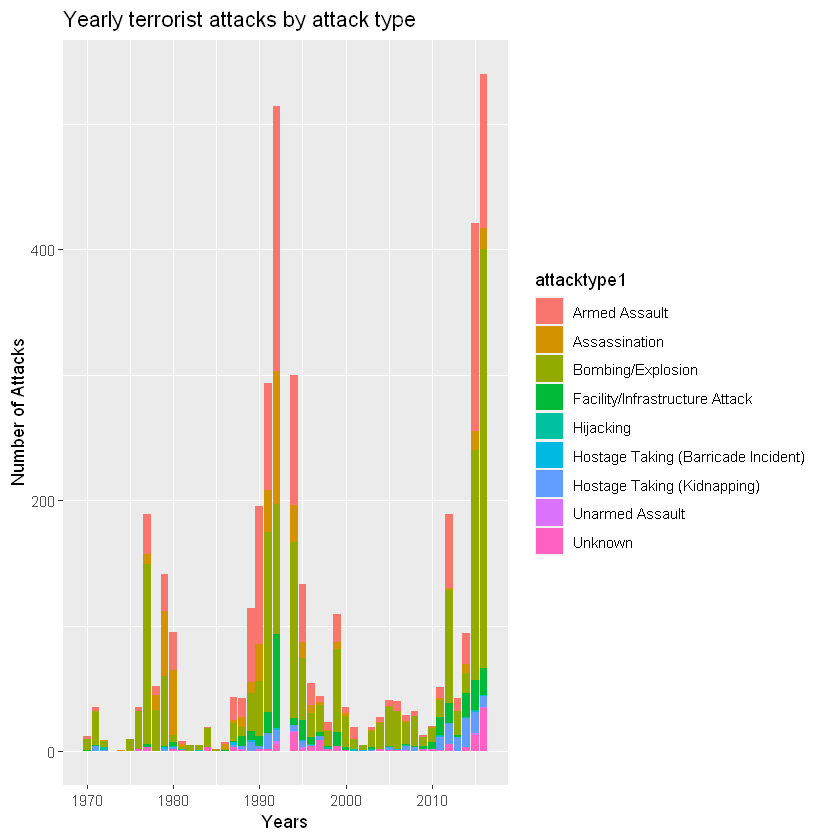

In [25]:
 ggplot(data=gtd.turkey, aes(x=year,fill=attacktype1)) + 
  geom_bar() + ggtitle("Yearly terrorist attacks by attack type")+         
    labs(x = "Years", y = "Number of Attacks")

### Terrorist attacks in Turkey between 1970-2016 by attack type

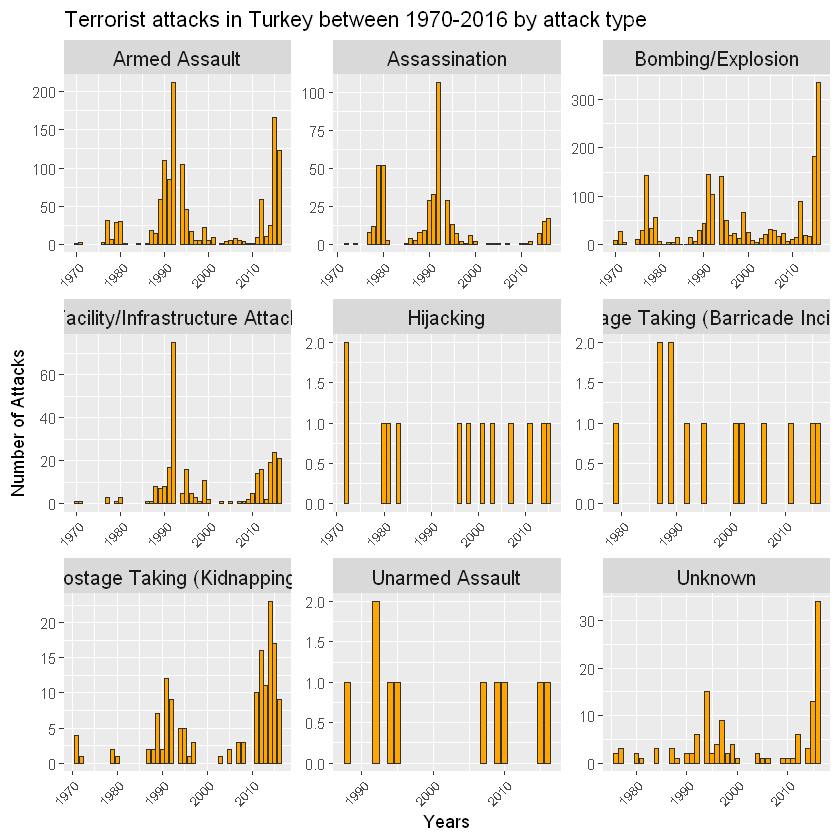

In [26]:
ggplot(gtd.turkey, aes(x = year))+ labs(title ="Terrorist attacks in Turkey between 1970-2016 by attack type", x = "Years", y = "Number of Attacks", size = 15) + 
  geom_bar(colour = "grey19", fill = "orange") +
  facet_wrap(~attacktype1,scales = "free", ncol = 3) + 
  theme(axis.text.x = element_text(angle=45,hjust = 1, size = 8)) +
  theme(strip.text = element_text(size = 12))

### Causalities in Turkey between 1970-2016 by attack type

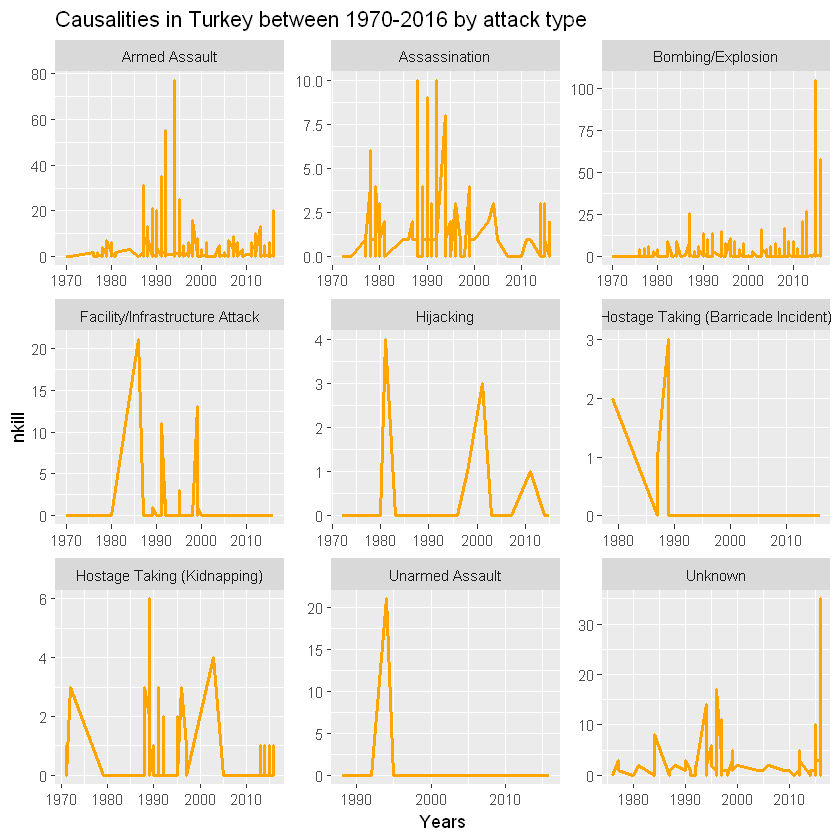

In [27]:
ggplot(gtd.turkey, aes(x = year,y=nkill))+ 
  labs(title ="Terrorist attacks in Turkey by attack type", x = "Years", y = "Number of Attacks", size = 15) + 
  geom_line(colour = "orange",size = 1) +
  facet_wrap(~attacktype1,scales = "free", ncol = 3) + 
  ggtitle("Causalities in Turkey between 1970-2016 by attack type")+
  labs(x = "Years", y = "nkill")

### gname vs targtype1

`summarise()` regrouping output by 'gname' (override with `.groups` argument)


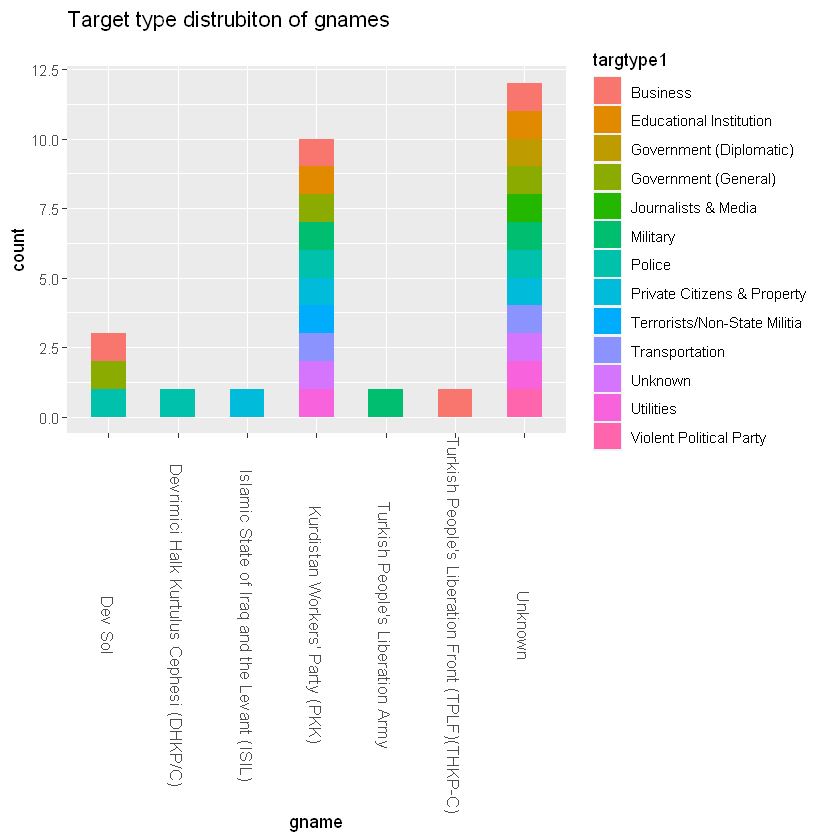

In [28]:
gnamevstargtype1<-gtd.turkey%>%
  group_by(gname, targtype1)%>%   
  summarise(numberOfEvents=n())%>% 
  filter(numberOfEvents>15)

# Histogram on a Categorical variable
g <- ggplot(gnamevstargtype1, aes(gname))
g + geom_bar(aes(fill=targtype1), width = 0.5) + 
  theme(axis.text.x = element_text(angle=-90, vjust=0.5,size=10)) + 
  labs(title="Target type distrubiton of gnames", 
       subtitle="") 

## Yearly terrorist attacks by Weapon type

Warning message:
"position_stack requires non-overlapping x intervals"

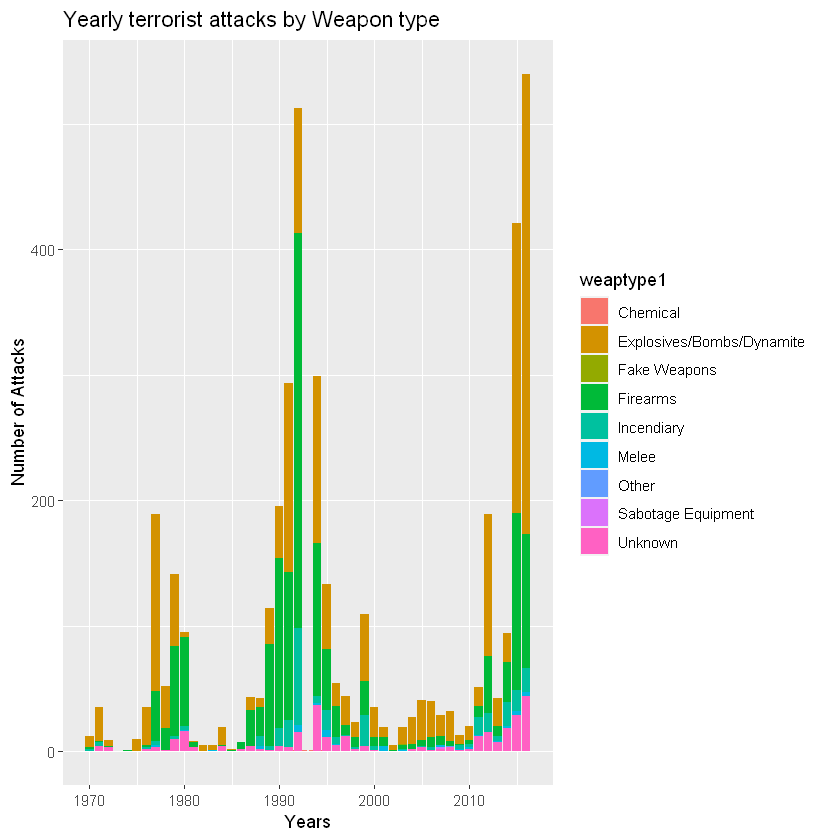

In [29]:
  ggplot(data=gtd.turkey, aes(x=year,fill=weaptype1)) + 
    geom_bar() + ggtitle("Yearly terrorist attacks by Weapon type")+ 
    labs(x = "Years", y = "Number of Attacks")  

# Analysis on Map

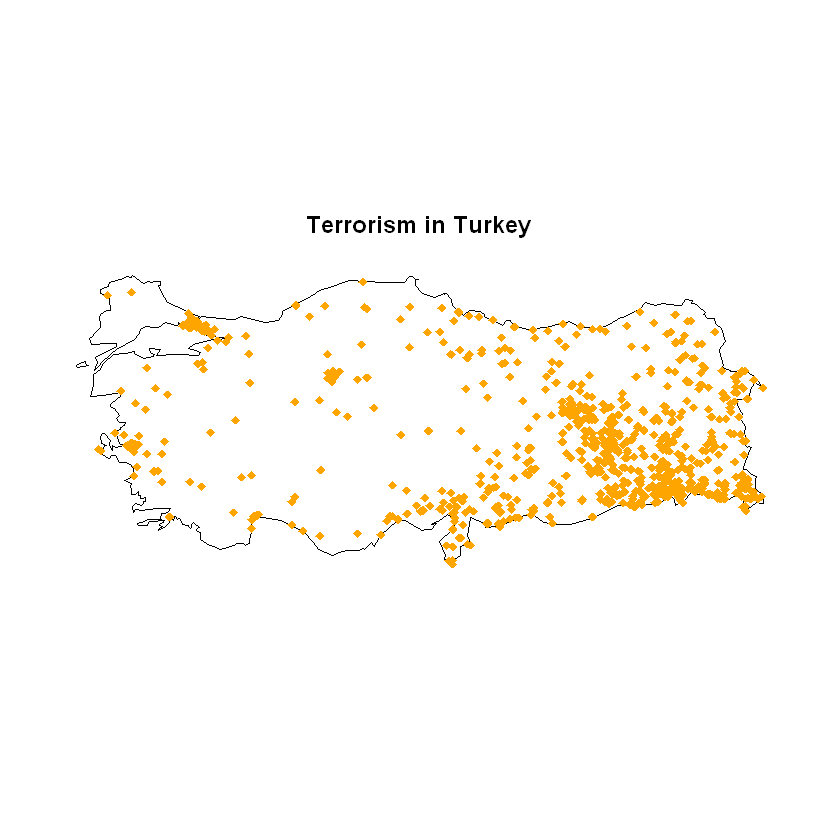

In [33]:
library(sp)           # spatial data classes and functions
library(maptools)
library(RColorBrewer)
library(maps)         # powerful and flexible mapping package


lon_lat <- data.frame(lon=gtd.turkey$longitude, lat=gtd.turkey$latitude)
map("world2Hires", "Turkey")
points(lon_lat$lon, lon_lat$lat, col="orange", pch=18)
title("Terrorism in Turkey")

In [31]:
install.packages("mapdata")

package 'mapdata' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Microsoft\AppData\Local\Temp\RtmpoFpcun\downloaded_packages


In [32]:
library(mapdata)

Warning message:
"package 'mapdata' was built under R version 3.6.3"

In [35]:
install.packages("ggmap")

also installing the dependencies 'RgoogleMaps', 'png', 'rjson', 'jpeg'



package 'RgoogleMaps' successfully unpacked and MD5 sums checked
package 'png' successfully unpacked and MD5 sums checked
package 'rjson' successfully unpacked and MD5 sums checked
package 'jpeg' successfully unpacked and MD5 sums checked
package 'ggmap' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Microsoft\AppData\Local\Temp\RtmpoFpcun\downloaded_packages


Warning message:
"package 'ggmap' was built under R version 3.6.3"Google's Terms of Service: https://cloud.google.com/maps-platform/terms/.
Please cite ggmap if you use it! See citation("ggmap") for details.
Warning message:
"Removed 164 rows containing missing values (geom_point)."

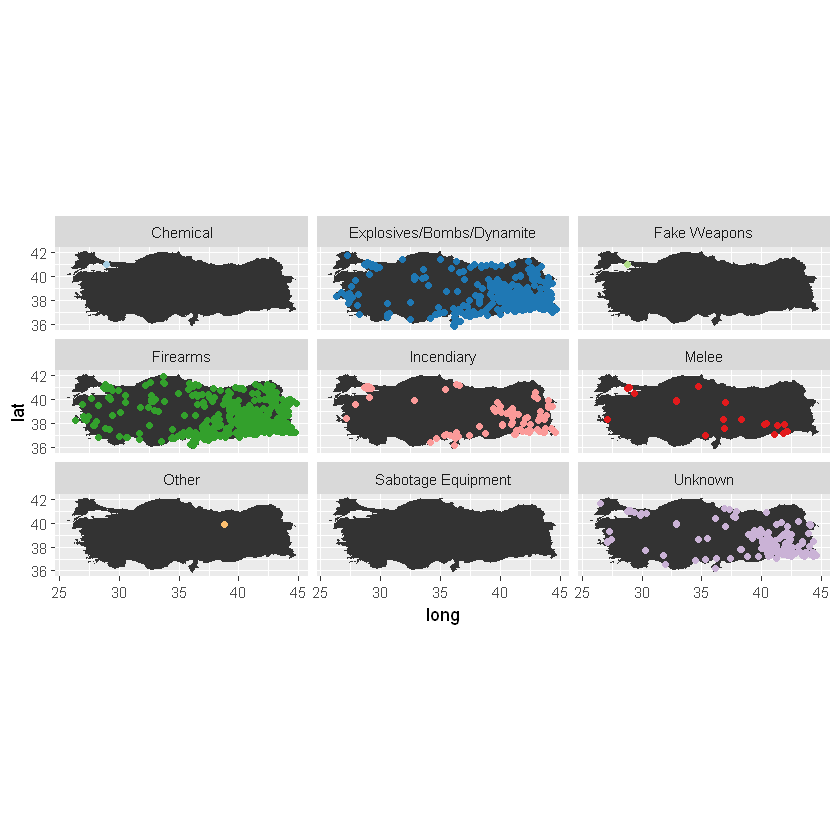

In [36]:
weapons<-unique(gtd.turkey$weaptype1)
library(ggmap)
map_tr<-map_data("world2Hires","Turkey")
map_by_weapon<- ggplot() + geom_polygon(data = map_tr, aes(x=long, y = lat, group = group)) + 
  coord_fixed(1)
map_by_weapon<-map_by_weapon+geom_point(data=gtd.turkey,aes(x=longitude,y=latitude,color=as.factor(weaptype1)))
map_by_weapon<-map_by_weapon+scale_color_brewer(palette="Paired")+facet_wrap(~weaptype1,ncol=3)+guides(color=F)
map_by_weapon